# **Escuela Politécnica Nacional**

# **Inteligencia Artificial**


---


# **Proyecto Final**

**Nombre:** David E. Morales M.

**Fecha:** 08/03/2021

# **Cálculo de IMC para la detección del estado de salud de una persona, obteniendo su estatura y peso a partir de una imagen**


> # Introducción


La estimación de la altura y el peso de las personas a partir de imágenes es un problema complejo, en la actualidad este estudio tiene muchos dominios de aplicación, como la vigilancia, el estudio del tráfico peatonal para la planificación urbana, el ajuste automático de prendas en tiendas en línea y la conducción autónoma.

Para determinar la composición corporal de una persona se estableció una red neuronal convolucional (CNN), encargada de determinar la estatura y peso de los individuos para el posterior cálculo del IMC, el calculo del IMC de cada uno de los sujetos empleando IMC=(peso en kg/ estatura en m2 ). Este indicador se calculó a utilizando la información real de los individuos y la información obtenida a traves de imagenes de los individuos.





> # Red Neuronal Convolucional



Para la predicción de la estatura y peso, se empleo una red neuronal convolucional CNN aplicando la conocida arquitectura U-Net. Para regularizar la red, tanto la predicción de la silueta humana (máscara) y las ubicaciones de las articulaciones se realizaron de manera simultanea. De esta manera, la calidad de la predicción de la estatura y peso va relacionada visualmente con la predicción de la máscara y las articulaciones.

La arquitectura U-Net de Ronnenberger es similar a la arquitectura original, con la única diferencia en que se utiliza un mayor número de canales de características en la parte de codificación. 
La entrada al modelo es una imagen RGB de tamaño 128 × 128; la red nos arroja tres salidas, uno para cada segmentación de silueta (creación de la máscara), predicción de articulación esquelética y predicción de la estatura y peso.



> Arquitectura de la Red U-Net



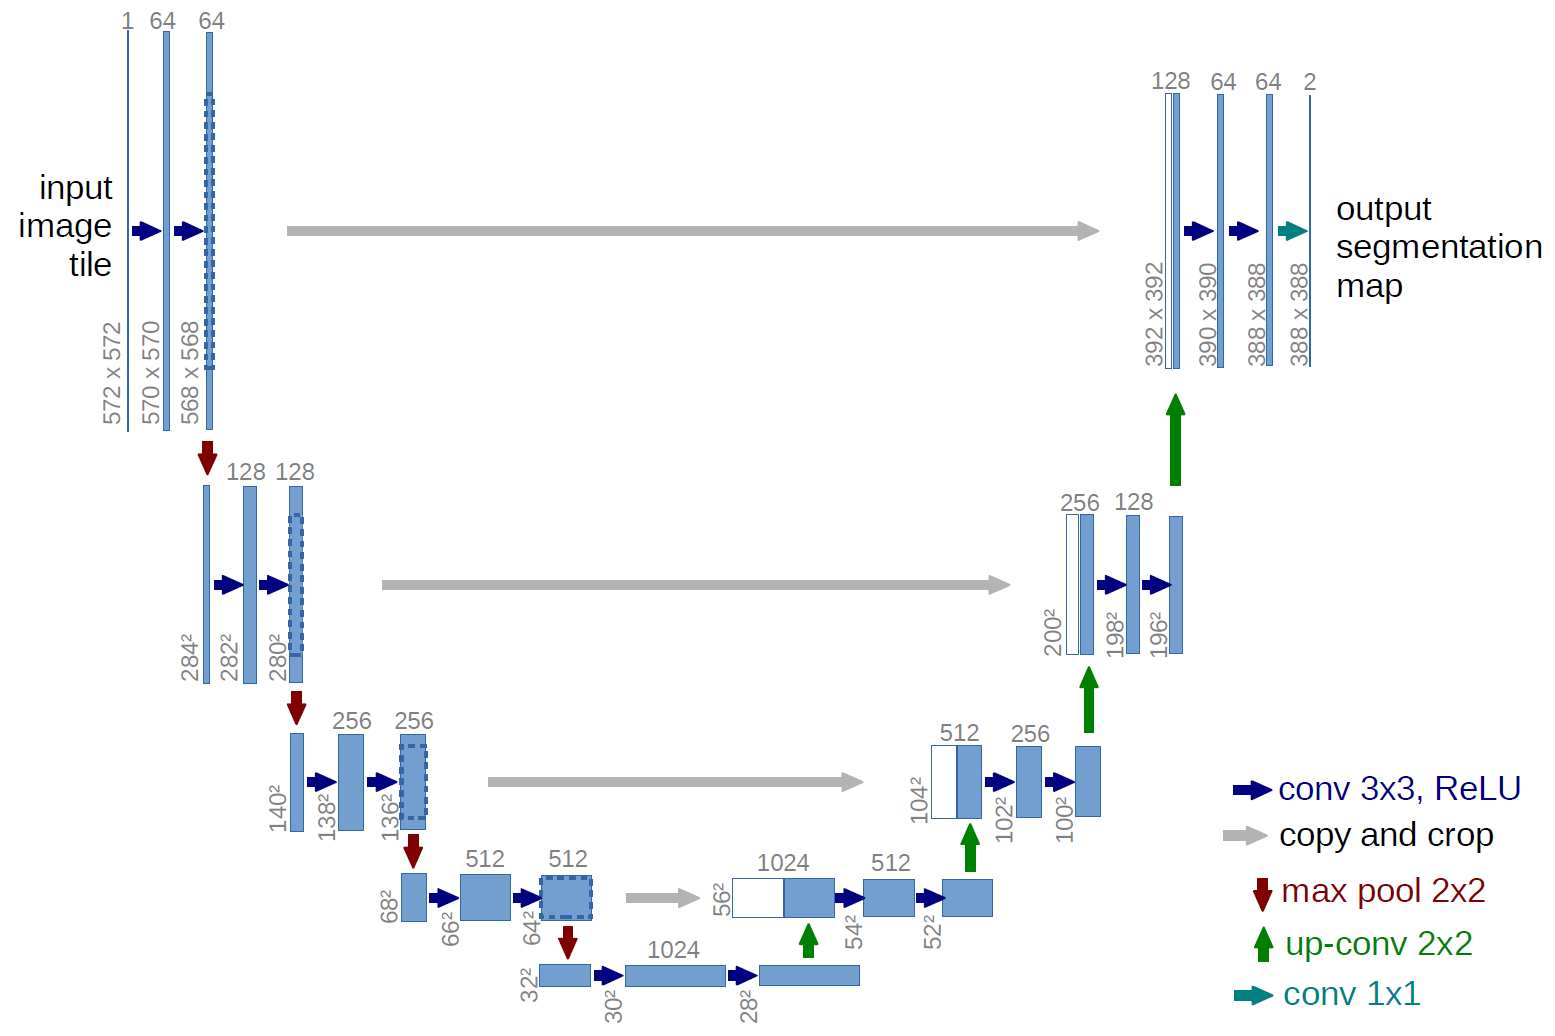

Esta arquitectura, incorpora un enfoque de extremo a extremo, esto quiere decir que predice valores de atributo al mismo tiempo que conjuntos y máscaras en un solo paso, generando predicciones certeras. 




El encabezado de atributo toma la última capa de U-Net como entrada a una capa de *Max Pooling* para permitir diferentes tamaños de imagen. Luego, mediante convoluciones 1 × 1 se obteniene una salida de 32 × 32 × 32. Esta salida alimenta directamente a una capa oculta de 1024 neuronas y una capa de *dropout*, para obtener la predicción de los atributos.



> Dataset









El modelo preentrenado presenta el siguiente dataset

Estatura 
* Entrenamiento......31000
* Prueba.....................6200
* Validación...............2000
* Total......................39200

Peso 
* Entrenamiento........3000
* Prueba.......................900
* Validación.................500
* Total........................4400 


Cada uno de los modelos preentrenados, se entreno para predecir cada uno de los atributos (estatura y peso) por separado. 

La red de predicción de estatura se entreno solo con pérdidas relacionadas con la predicción de máscara, articulación y altura en el conjunto de datos IMDB con 31000 imágenes.

- Entrenamiento Modelo de Estatura

Para el caso de estimación de la estatura, se utilizo el optimizador *Adam* con una tasa de aprendizaje de *1e - 4*. Estableciendo el tamaño del lote en 16, entrenamos la red durante 50 épocas y retenemos el *checkpoint* del modelo con la mejor pérdida de validación para las pruebas.

- Entrenamiento Modelo de Peso

Para el caso de estimación del peso, se inicializan los pesos en la parte U-Net con los pesos del mejor modelo para la estimación de la estatura. Después se ingresa como entrada, el conjunto de entrenamiento del conjunto de datos de peso que consta de 3000 imágenes. Nuevamente se establecio el tamaño del lote en 16, entrenamos la red durante 100 épocas usando el optimizador *Adam* con una tasa de aprendizaje de *1e − 4* y retenemos el *checkpoint* del modelo con la mejor pérdida de validación para las pruebas.








> Articulaciones, Máscara y Esqueleto



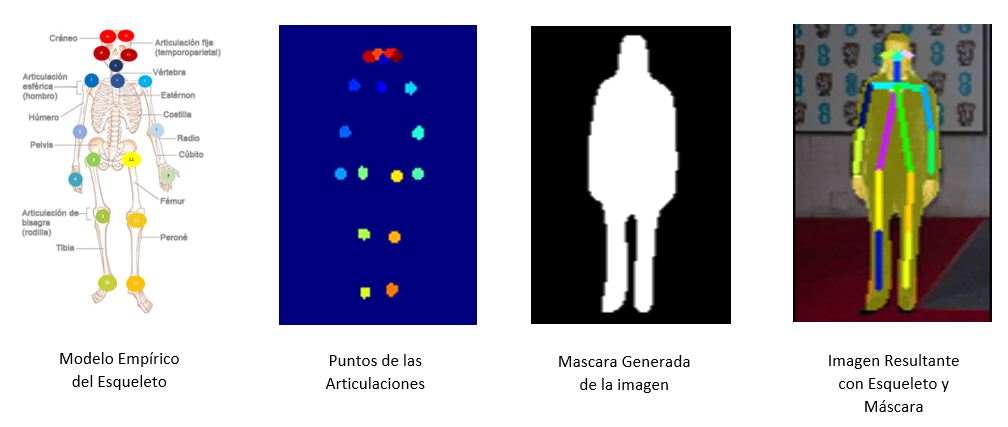

La imagen es procesada, reduciendola hasta poder almacenarla en un tensor, implementando el código de *Esqueleto.py* se puede definir los puntos de las articulaciones necesarias para formar el esqueleto sobre el individuo, en este se detallan una serie de puntos *vecinos* con los cuales se alinearan las articulaciones. 

Para la creación de la máscara, dentro de *Estatura_y_Peso.py* se detalla la creación de la máscara de la imagen con centroides. Para realizar esta tarea se implementa la Segmentación Semántica.

Como resultado, la unión de los puntos procede a formar un esqueleto con la información de los *vecinos*, y esta se une a la mascará en RGB generada a partir de la máscara en binario.

El resultado es la unión de la imagen inicial redimensionada, la máscara en RGB (Amarillo) y el esqueleto creado, todo esto aplicando el método de adición de imagenes con distinta transparencia, usamos la función *addWeighted* de OpenCv para realizar esto. 



> # Sobre los Problemas de Salud Relacionados al IMC



En la actualidad incremento del sobrepeso y de la obesidad a nivel mundial ha sido ampliamente reportado por la comunidad científica. Según los últimos cálculos de la Organización Mundial de la Salud (OMS) indican que en el 2015 existen aproximadamente 2300 millones de adultos con sobrepeso y más de setencientos millones con obesidad. En Latinoamérica esta tendencia también ha sido observada en países como Chile, México, Brasil, Argentina, Perú, Colombia, Ecuador y Bolivia.

Además, es importante reconocer algunos determinantes sociales de la salud, tomando en consideración dos de sus aspectos como las inequidades en salud y los elementos de la estructura social que condicionan la posición que las personas alcanzan en la sociedad y que tienen un efecto directo en la distribución de los problemas o de los factores protectores de la salud.

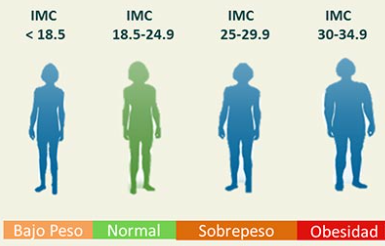

In [ ]:
torch.cuda.set_device(0)
torch.cuda.current_device()


> # Análisis de Resultados




Primero verificaremos los resultados del entrenamiento del modelo preentrenado utilizado en el proyecto




> Rendimiento del modelo en la estimación de la Estatura





Entrenamiento adicional después de casi la época 45 al disminuir la tasa de aprendizaje.

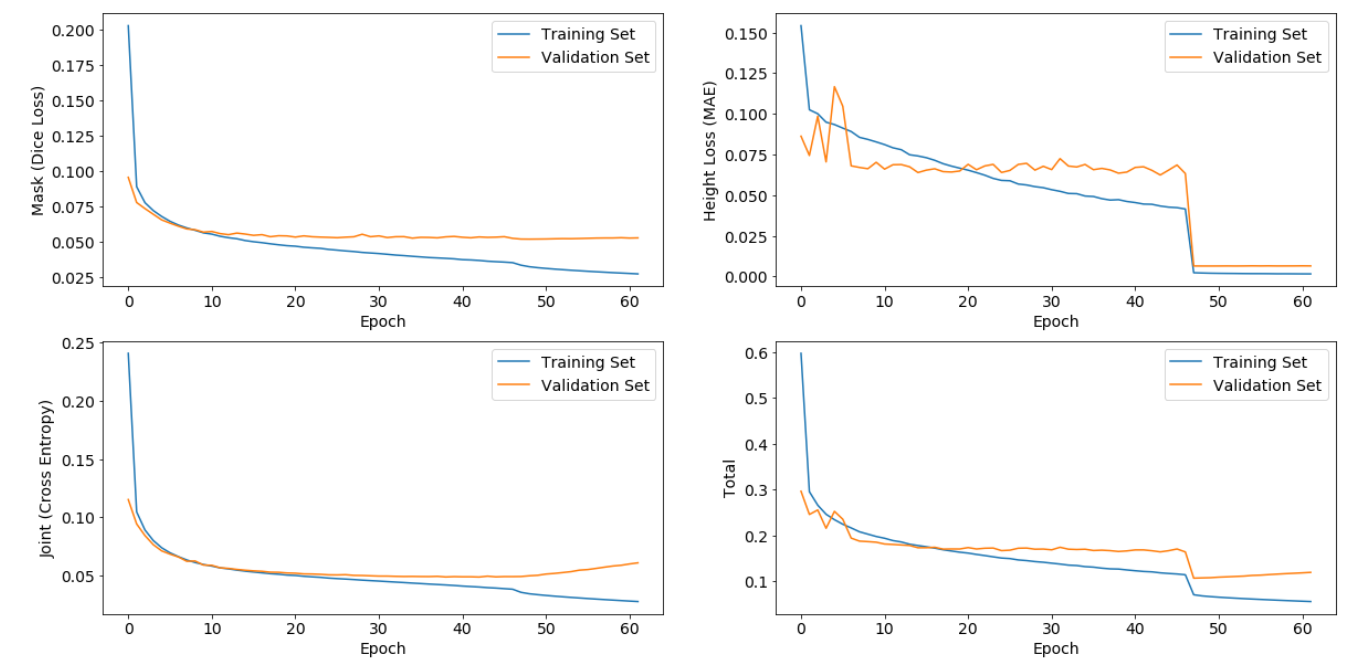

        Error de estimación de altura (MAE): 6.136 cm

> Rendimiento del modelo en la estimación del Peso


Entrenamiento adicional después de casi la trigésima época al disminuir la tasa de aprendizaje.

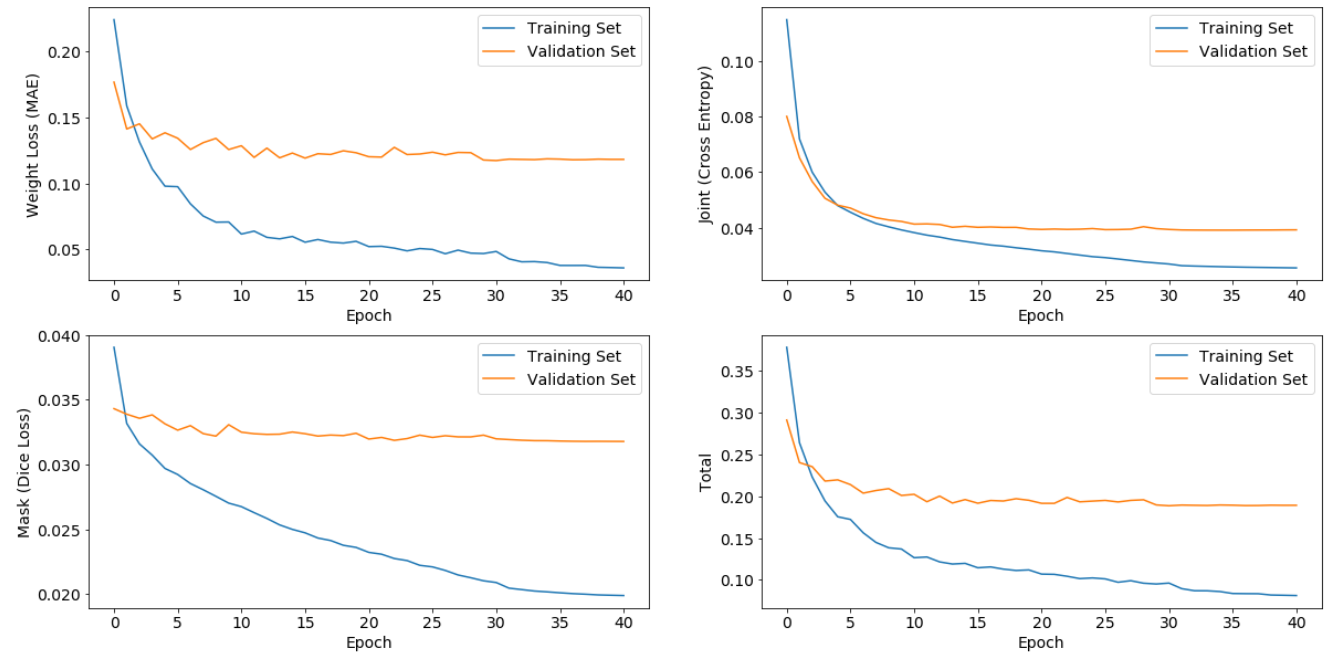

          Error de estimación de peso (MAE): 9,8 kg



> Lectura de Datos


Se procedio a realizar el análisis de resultados de 50 sujetos de ambos sexos, como resultado de esta evaluación se obtuvo un dataset con las estaturas y pesos predichos y reales, así como la evaluación del IMC y la determinación de su composición corporal.

In [ ]:
#Librerias
import numpy as np 
import pandas as pd 
import io
import csv
import math
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
files.upload()

Saving resultados_modelo.csv to resultados_modelo.csv


{'resultados_modelo.csv': b'nombre,estatura_predicho,peso_predicho,estatura_real,peso_real,IMC_predicho,IMC_real,estado_predicho,estado_real,v_estado_predicho,v_estado_real\r\nm_adele,165.7,84.7,175,83,30.85,27.10,Obesidad,Sobrepeso,4,3\r\nm_charlize,170.7,55.1,177,55,18.91,17.56,Normal,Bajo Peso,2,1\r\nm_emma,167.5,53,165,50,18.89,18.37,Normal,Bajo Peso,2,1\r\nm_angelina,169.8,52.1,173,52,18.07,17.37,Bajo Peso,Bajo Peso,1,1\r\nm_zendaya,170.6,72.9,178,59,25.05,18.62,Sobrepeso,Normal,3,2\r\nm_dua,165.3,69.5,173,68,25.44,22.72,Sobrepeso,Normal,3,2\r\nm_gal,174.5,69.4,178,52,22.79,16.41,Normal,Bajo Peso,2,1\r\nm_margot,168,56.2,168,57,19.91,20.20,Normal,Normal,2,2\r\nm_mila,163.3,55.2,163,52,20.70,19.57,Normal,Normal,2,2\r\nm_natalie,165.4,64,160,50,23.39,19.53,Normal,Normal,2,2\r\nm_rosalia,168.7,69.2,175,67,24.32,21.88,Normal,Normal,2,2\r\nm_salma,167.6,67,157,55,23.85,22.31,Normal,Normal,2,2\r\nm_sofia,165.4,64.8,170,64,23.69,22.15,Normal,Normal,2,2\r\nm_scarlet,178.8,64.5,161,50,20.1

In [ ]:
#Impresión de Resultados
resultados = pd.read_csv('resultados_modelo.csv')
# Comprobando la carga de los datasets 
resultados_modelo = pd.DataFrame(resultados)
print(resultados_modelo)

        nombre  estatura_predicho  ...  v_estado_predicho  v_estado_real
0      m_adele              165.7  ...                  4              3
1   m_charlize              170.7  ...                  2              1
2       m_emma              167.5  ...                  2              1
3   m_angelina              169.8  ...                  1              1
4    m_zendaya              170.6  ...                  3              2
5        m_dua              165.3  ...                  3              2
6        m_gal              174.5  ...                  2              1
7     m_margot              168.0  ...                  2              2
8       m_mila              163.3  ...                  2              2
9    m_natalie              165.4  ...                  2              2
10   m_rosalia              168.7  ...                  2              2
11     m_salma              167.6  ...                  2              2
12     m_sofia              165.4  ...             



> # Análisis de la Estatura






> > Calculando el MAE de la Estatura





In [ ]:
#Calculando el Error Absoluto Medio

#Asignando listas para los datos predichos y reales
e_true = []
for index, fila in resultados_modelo.iterrows():
  e_true.append(float(fila['estatura_real']))

e_pred = []
for index, fila in resultados_modelo.iterrows():
  e_pred.append(float(fila['estatura_predicho']))

print('Lista Estatura Real')
print(e_true)
print('\nLista Estatura Predicha')
print(e_pred)

#Calculo del MAE
mae_estatura = mean_absolute_error(e_true, e_pred)
print('\nError Absoluto Medio de la Estatura')
print(f'{mae_estatura:,.2f}')

Lista Estatura Real
[175.0, 177.0, 165.0, 173.0, 178.0, 173.0, 178.0, 168.0, 163.0, 160.0, 175.0, 157.0, 170.0, 161.0, 164.0, 170.0, 166.0, 164.0, 170.0, 175.0, 163.0, 169.0, 163.0, 171.0, 168.0, 169.0, 166.0, 198.0, 190.0, 185.0, 187.0, 183.0, 183.0, 185.0, 186.0, 188.0, 170.0, 183.0, 180.0, 173.0, 175.3, 175.0, 186.0, 193.0, 175.0, 179.0, 180.0, 195.0, 175.0, 182.0]

Lista Estatura Predicha
[165.7, 170.7, 167.5, 169.8, 170.6, 165.3, 174.5, 168.0, 163.3, 165.4, 168.7, 167.6, 165.4, 178.8, 169.8, 168.5, 163.8, 168.6, 167.7, 168.9, 164.5, 181.7, 163.7, 166.7, 167.2, 180.5, 170.5, 178.9, 179.1, 186.4, 186.1, 182.5, 182.5, 180.5, 177.7, 184.6, 185.0, 180.3, 182.6, 188.6, 168.5, 177.2, 182.3, 183.9, 171.9, 177.8, 180.8, 176.5, 178.9, 172.0]

Error Absoluto Medio de la Estatura
5.76


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


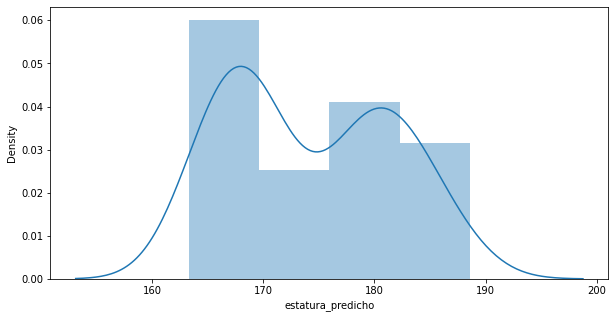

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['estatura_predicho'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


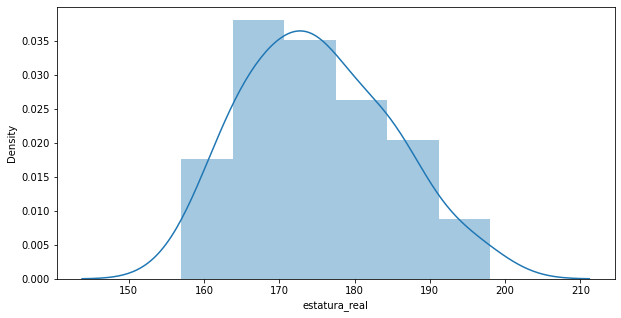

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['estatura_real'])

# **Análisis del Peso**


> Calculando el MAE del Peso



In [ ]:
#Calculando el Error Absoluto Medio

#Asignando listas para los datos predichos y reales
p_true = []
for index, fila in resultados_modelo.iterrows():
  p_true.append(float(fila['peso_real']))

p_pred = []
for index, fila in resultados_modelo.iterrows():
  p_pred.append(float(fila['peso_predicho']))

print('Lista Peso Real')
print(p_true)
print('\nLista Peso Predicho')
print(p_pred)

#Calculo del MAE
mae_peso = mean_absolute_error(p_true, p_pred)
print('\nError Absoluto Medio del Peso')
print(f'{mae_peso:,.2f}')

Lista Peso Real
[83.0, 55.0, 50.0, 52.0, 59.0, 68.0, 52.0, 57.0, 52.0, 50.0, 67.0, 55.0, 64.0, 50.0, 53.0, 62.0, 55.0, 62.0, 52.0, 59.0, 54.0, 54.0, 58.0, 54.0, 52.0, 67.0, 53.0, 98.0, 91.0, 92.0, 83.0, 83.0, 95.0, 85.0, 86.0, 82.0, 68.0, 75.0, 78.0, 71.0, 67.1, 70.0, 86.0, 97.0, 68.0, 76.0, 76.0, 95.0, 80.0, 62.0]

Lista Peso Predicho
[84.7, 55.1, 53.0, 52.1, 72.9, 69.5, 69.4, 56.2, 55.2, 64.0, 69.2, 67.0, 64.8, 64.5, 63.5, 56.5, 62.4, 60.6, 66.1, 72.3, 54.4, 67.8, 66.2, 66.2, 64.2, 90.8, 69.5, 102.2, 76.6, 76.1, 90.5, 81.4, 112.2, 80.5, 73.4, 79.8, 85.6, 80.1, 82.5, 82.1, 76.4, 76.6, 72.8, 100.4, 72.3, 76.6, 94.8, 95.8, 73.5, 73.6]

Error Absoluto Medio del Peso
8.36


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


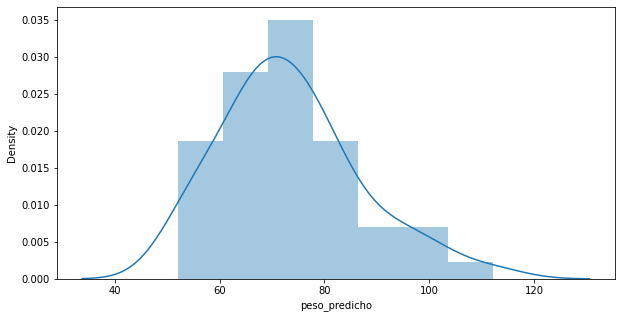

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['peso_predicho'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


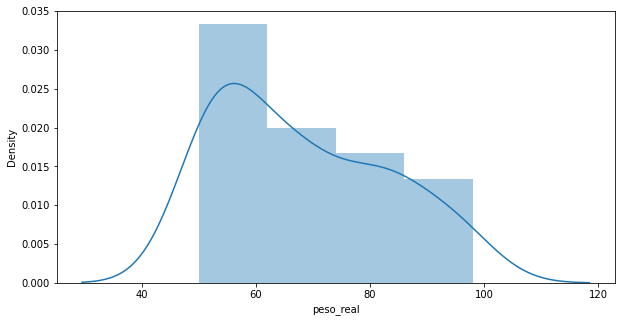

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['peso_real'])

# **Análisis del IMC**


> Calculando el MAE del IMC



In [ ]:
#Calculando el Error Absoluto Medio

#Asignando listas para los datos predichos y reales
imc_true = []
for index, fila in resultados_modelo.iterrows():
  imc_true.append(float(fila['IMC_real']))

imc_pred = []
for index, fila in resultados_modelo.iterrows():
  imc_pred.append(float(fila['IMC_predicho']))

print('Lista IMC Real')
print(imc_true)
print('\nLista IMC Predicho')
print(imc_pred)

#Calculo del MAE
mae_imc = mean_absolute_error(imc_true, imc_pred)
print('\nError Absoluto Medio del IMC')
print(f'{mae_imc:,.2f}')

Lista IMC Real
[27.1, 17.56, 18.37, 17.37, 18.62, 22.72, 16.41, 20.2, 19.57, 19.53, 21.88, 22.31, 22.15, 19.29, 19.71, 21.45, 19.96, 23.05, 17.99, 19.27, 20.32, 18.91, 21.83, 18.47, 18.42, 23.46, 19.23, 25.0, 25.21, 26.88, 23.74, 24.78, 28.37, 24.84, 24.86, 23.2, 23.53, 22.4, 24.07, 23.72, 21.84, 22.86, 24.86, 26.04, 22.2, 23.72, 23.46, 24.98, 26.12, 18.72]

Lista IMC Predicho
[30.85, 18.91, 18.89, 18.07, 25.05, 25.44, 22.79, 19.91, 20.7, 23.39, 24.32, 23.85, 23.69, 20.18, 22.02, 19.9, 23.26, 21.32, 23.5, 25.34, 20.1, 20.54, 24.7, 23.82, 22.96, 27.87, 23.91, 31.93, 23.88, 21.9, 26.13, 24.44, 33.69, 24.71, 23.24, 23.42, 25.01, 24.64, 24.74, 23.08, 26.91, 24.4, 21.91, 29.69, 24.47, 24.23, 29.0, 30.75, 22.97, 24.88]

Error Absoluto Medio del IMC
2.85


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


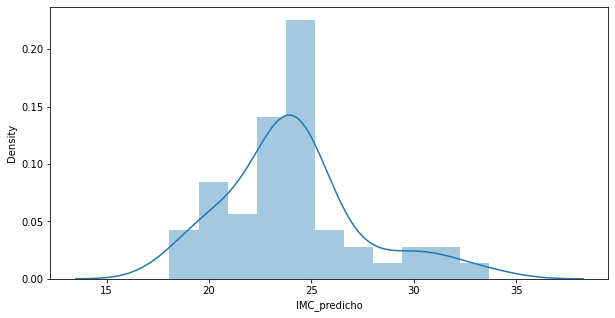

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['IMC_predicho'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


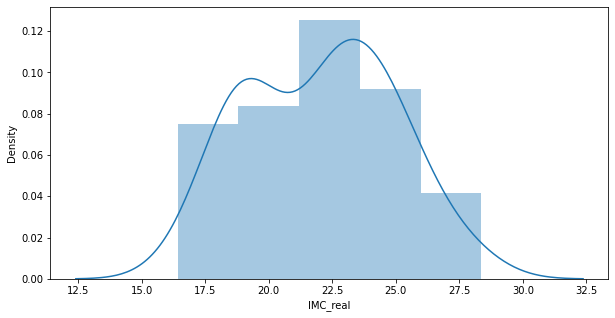

In [ ]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['IMC_real'])

# **Análisis de Predicción del Estado**



In [ ]:
estado_true = []
for index, fila in resultados_modelo.iterrows():
  estado_true.append((fila['v_estado_real']))

estado_pred = []
for index, fila in resultados_modelo.iterrows():
  estado_pred.append((fila['v_estado_predicho']))

print('Lista Estado Real')
print(estado_true)
print('\nLista Estado Predicho')
print(estado_pred)

Lista Estado Real
[3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2]

Lista Estado Predicho
[4, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 4, 2, 2]


|---------------Entrenamiento---------------|
|---------------Reporte---------------|
              precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           2       0.75      0.73      0.74        37
           3       0.11      0.17      0.13         6
           4       0.00      0.00      0.00         0

    accuracy                           0.58        50
   macro avg       0.47      0.26      0.28        50
weighted avg       0.71      0.58      0.60        50

|---------------Matriz de Confusión---------------|
[[ 1  6  0  0]
 [ 0 27  8  2]
 [ 0  3  1  2]
 [ 0  0  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


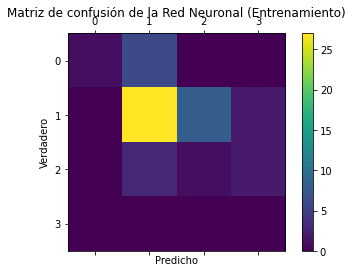

In [ ]:
# Matriz de Confusión
matriz_confusion = confusion_matrix(estado_true, estado_pred)
reporte = classification_report(estado_true, estado_pred)

#Impresion
print("|---------------Reporte---------------|")
print(reporte)
print("|---------------Matriz de Confusión---------------|")
print(matriz_confusion)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matriz_confusion)
plt.title('Matriz de confusión de los resultados del Modelo')
fig.colorbar(cax)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()


> Calculando el MAE del Estado



In [ ]:
#Calculando el Error Absoluto Medio

#Asignando listas para los datos predichos y reales
estado_true = []
for index, fila in resultados_modelo.iterrows():
  estado_true.append(float(fila['v_estado_real']))

estado_pred = []
for index, fila in resultados_modelo.iterrows():
  estado_pred.append(float(fila['v_estado_predicho']))

print('Lista Estado Real')
print(estado_true)
print('\nLista Estado Predicho')
print(estado_pred)

#Calculo del MAE
mae_estado = mean_absolute_error(estado_true, estado_pred)
print('\nError Absoluto Medio del Estado')
print(f'{mae_estado:,.2f}')

Lista Estado Real
[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]

Lista Estado Predicho
[4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0]

Error Absoluto Medio del Estado
0.46


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


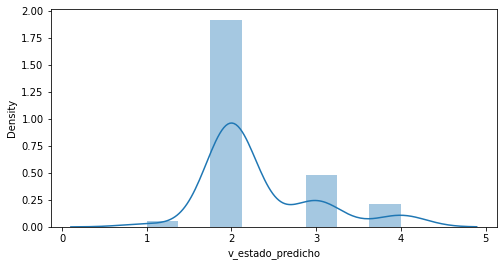

In [ ]:
plt.figure(figsize=(8,4))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['v_estado_predicho'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


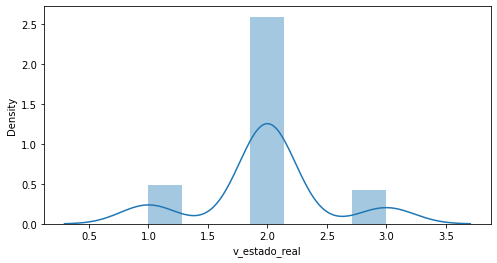

In [ ]:
plt.figure(figsize=(8, 4))
plt.tight_layout()
seabornInstance.distplot(resultados_modelo['v_estado_real'])


> # Ejemplo




1.   En la consola de comandos
2.   Nos dirijimos al directorio donde se encuentra nuestro código "Estatura_y_Peso.py"
3. Ingresamos el comando
*python Estatura_y_Peso.py -i entrada/[nombre de la imagen].[formato de la imagen] -g 1 -r 128*
4. Observamos los datos creados en el directorio /salida

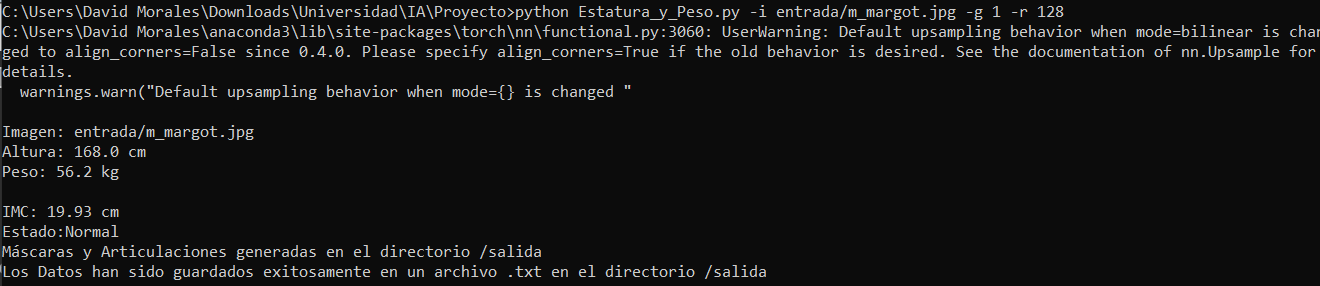

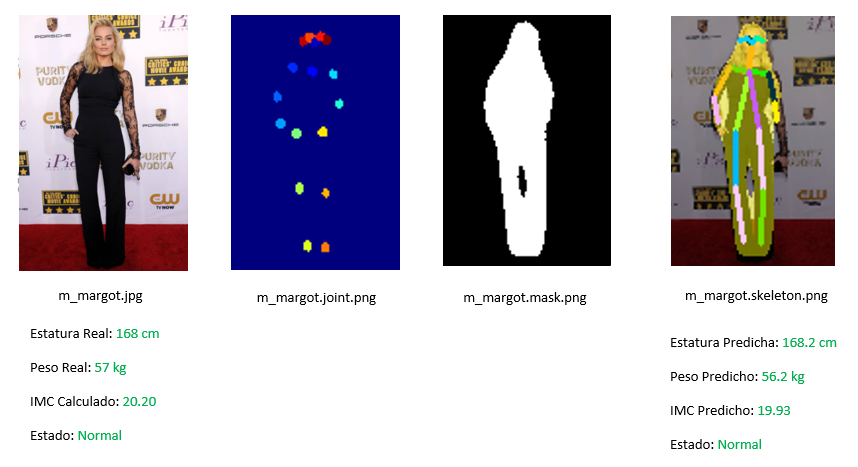

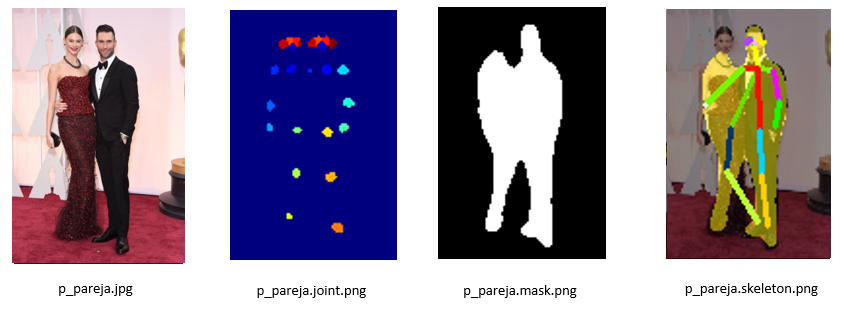

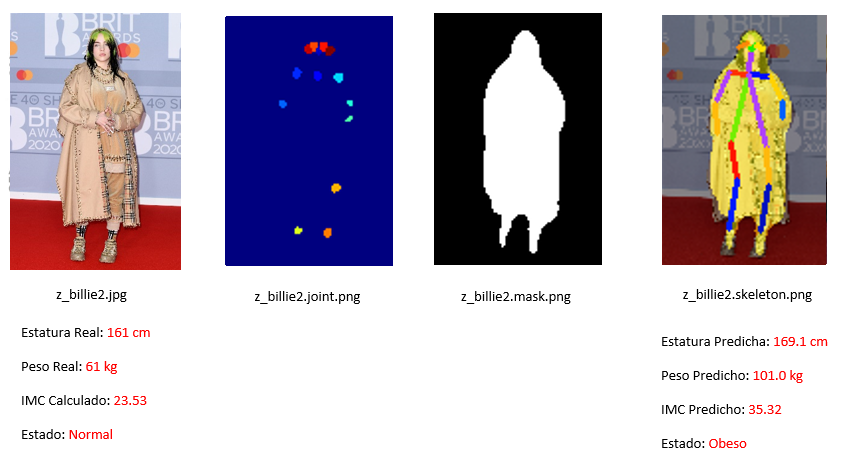


> # Conclusiones



* Realizados adaptaciones al dropout de las redes se logró reducir el MAE en la predicción de los modelos, esto acompañado del calculo del IMC a partir de estas medidas permitio obtener una predicción del 58% de precisión al comportamiento corporal de los individuos.

* Como se mencionó en la introducción, el campo de aplicación de este proyecto es muy variado, si bien la predicción del IMC no es tan certera o precisa, esto se puede mejorar, entrenando especialmente la red de peso o incorporando una red neuronal artificial complementaria que permita definir el estado del IMC de una manera más precisa.

* Otras aplicaciones para la predicción de la estatura y el peso pueden ser la identificación de individuos, estudios de planificación urbana, un recomendador de tiendas de ropa que oferten ropa de la talla determinada, entre otros.

* En relación con sus determinantes sociales y económicos, la obesidad es mayor en personas de clase baja y media, en comparación con aquellas de clase alta.Esto se evidencia con las curvas de densidad generadas en el proyecto.

* La predicción de la mascara, esqueleto y atributos (peso y altura) en forma paralela asegura que la red no converja a estadísticas simples como el valor medio.

* Las imagenes ingresadas deben respetar el formato jpg, png o jpeg para poder ser procesadas, se ha determinado una mejor predicción de datos cuando el individuo se encuentra centrado y se ve su cuerpo completo.


* El procesamiento de los datos se ha realizado sin la implementación de CUDA, no se utilizo la tarjeta gráfica GeForce MX130 debido a su bajo nivel de procesamiento pues es una versión hecha específicamente para portátiles, sirve para entrenar modelos sencillos, sin embargo este proyecto presenta un alto manejo de capas, los cuales terminan por causar problemas térmicos y la posterior degradación del ventilador.

* Se intento trasladar el entorno de ejecución a Google Colab para mejorar el procesamiento, sin embargo, existieron problemas al importar los modelos preentrenados debido a su peso (2GB) cada uno y al incorporar las opciones de configuración para la carga de datos, especialmente enfocados al uso de la gpu en *load_state_dict* de torch. Sin embargo este problema fue facilmente resuelto, y el código funciona mediante la línea de comandos.




> # Código del Proyecto



Todos los códigos del presente proyecto se encuentran en el repositorio del siguiente enlace

https://github.com/David-Morales-M/ProyectoArtificial.git


> # Referencias




*   Álvarez-Castaño, Luz Stella; Goez-Rueda, Juan Diego; Carreño-Aguirre, Cristina
Factores sociales y económicos asociados a la obesidad: los efectos de la inequidad y de la pobreza
Revista Gerencia y Políticas de Salud, vol. 11, núm. 23, julio-diciembre, 2012, pp. 98-110
Pontificia Universidad Javeriana
Bogotá, Colombia

*   Chauhan, N. S. (2020, 17 diciembre). Una Guía Para Principiantes Sobre La Regresión Lineal En Python Con Scikit-Learn. DataSource.ai. https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

* Calculadora del índice de masa corporal (IMC). (2021, 22 enero). Texas Heart Institute. https://www.texasheart.org/heart-health/heart-information-center/topics/calculadora-del-indice-de-masa-corporal-imc/´

* @inproceedings{altinigne2020height,
  title={Height and Weight Estimation from Unconstrained Images},
  author={Altinigne, Can Yilmaz and Thanou, Dorina and Achanta, Radhakrishna},
  booktitle={ICASSP 2020-2020 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP)},
  pages={2298--2302},
  year={2020},
  organization={IEEE}
}







> Calculando el RMSE de la Estatura



In [ ]:
#Calculando la Raíz del Error Cuadrático Medio

#Asignando listas para los datos predichos y reales
e_true = []
for index, fila in resultados_modelo.iterrows():
  e_true.append(float(fila['estatura_real']))

e_pred = []
for index, fila in resultados_modelo.iterrows():
  e_pred.append(float(fila['estatura_predicho']))

print('Lista Estatura Real')
print(e_true)
print('\nLista Estatura Predicha')
print(e_pred)

#Calculo del MAE
rmse_estatura = math.sqrt(mean_squared_error(e_true, e_pred))
print('\nRaíz del Error Cuadrático Medio de la Estatura')
print(f'{rmse_estatura:,.2f}')

Lista Estatura Real
[175.0, 177.0, 165.0, 173.0, 178.0, 173.0, 178.0, 168.0, 163.0, 160.0, 175.0, 157.0, 170.0, 161.0, 164.0, 170.0, 166.0, 164.0, 170.0, 175.0, 163.0, 169.0, 163.0, 171.0, 168.0, 169.0, 166.0, 198.0, 190.0, 185.0, 187.0, 183.0, 183.0, 185.0, 186.0, 188.0, 170.0, 183.0, 180.0, 173.0, 175.3, 175.0, 186.0, 193.0, 175.0, 179.0, 180.0, 195.0, 175.0, 182.0]

Lista Estatura Predicha
[165.7, 170.7, 167.5, 169.8, 170.6, 165.3, 174.5, 168.0, 163.3, 165.4, 168.7, 167.6, 165.4, 178.8, 169.8, 168.5, 163.8, 168.6, 167.7, 168.9, 164.5, 181.7, 163.7, 166.7, 167.2, 180.5, 170.5, 178.9, 179.1, 186.4, 186.1, 182.5, 182.5, 180.5, 177.7, 184.6, 185.0, 180.3, 182.6, 188.6, 168.5, 177.2, 182.3, 183.9, 171.9, 177.8, 180.8, 176.5, 178.9, 172.0]

Raíz del Error Cuadrático Medio de la Estatura
7.64




> Calculando el RMSE del Peso



In [ ]:
#Calculando la Raíz del Error Cuadrático Medio

#Asignando listas para los datos predichos y reales
p_true = []
for index, fila in resultados_modelo.iterrows():
  p_true.append(float(fila['peso_real']))

p_pred = []
for index, fila in resultados_modelo.iterrows():
  p_pred.append(float(fila['peso_predicho']))

print('Lista Peso Real')
print(e_true)
print('\nLista Peso Predicha')
print(e_pred)

#Calculo del MAE
rmse_peso = math.sqrt(mean_squared_error(p_true, p_pred))
print('\nRaíz del Error Cuadrático Medio del Peso')
print(f'{rmse_peso:,.2f}')

Lista Peso Real
[175.0, 177.0, 165.0, 173.0, 178.0, 173.0, 178.0, 168.0, 163.0, 160.0, 175.0, 157.0, 170.0, 161.0, 164.0, 170.0, 166.0, 164.0, 170.0, 175.0, 163.0, 169.0, 163.0, 171.0, 168.0, 169.0, 166.0, 198.0, 190.0, 185.0, 187.0, 183.0, 183.0, 185.0, 186.0, 188.0, 170.0, 183.0, 180.0, 173.0, 175.3, 175.0, 186.0, 193.0, 175.0, 179.0, 180.0, 195.0, 175.0, 182.0]

Lista Peso Predicha
[165.7, 170.7, 167.5, 169.8, 170.6, 165.3, 174.5, 168.0, 163.3, 165.4, 168.7, 167.6, 165.4, 178.8, 169.8, 168.5, 163.8, 168.6, 167.7, 168.9, 164.5, 181.7, 163.7, 166.7, 167.2, 180.5, 170.5, 178.9, 179.1, 186.4, 186.1, 182.5, 182.5, 180.5, 177.7, 184.6, 185.0, 180.3, 182.6, 188.6, 168.5, 177.2, 182.3, 183.9, 171.9, 177.8, 180.8, 176.5, 178.9, 172.0]

Raíz del Error Cuadrático Medio del Peso
10.40




> Calculando el RMSE del IMC



In [ ]:
#Calculando la Raíz del Error Cuadrático Medio

#Asignando listas para los datos predichos y reales
imc_true = []
for index, fila in resultados_modelo.iterrows():
  imc_true.append(float(fila['IMC_real']))

imc_pred = []
for index, fila in resultados_modelo.iterrows():
  imc_pred.append(float(fila['IMC_predicho']))

print('Lista IMC Real')
print(imc_true)
print('\nLista IMC Predicha')
print(imc_pred)

#Calculo del RMSE
rmse_imc = math.sqrt(mean_squared_error(imc_true, imc_pred))
print('\nRaíz del Error Cuadrático Medio del IMC')
print(f'{rmse_imc:,.2f}')

Lista IMC Real
[27.1, 17.56, 18.37, 17.37, 18.62, 22.72, 16.41, 20.2, 19.57, 19.53, 21.88, 22.31, 22.15, 19.29, 19.71, 21.45, 19.96, 23.05, 17.99, 19.27, 20.32, 18.91, 21.83, 18.47, 18.42, 23.46, 19.23, 25.0, 25.21, 26.88, 23.74, 24.78, 28.37, 24.84, 24.86, 23.2, 23.53, 22.4, 24.07, 23.72, 21.84, 22.86, 24.86, 26.04, 22.2, 23.72, 23.46, 24.98, 26.12, 18.72]

Lista IMC Predicha
[30.85, 18.91, 18.89, 18.07, 25.05, 25.44, 22.79, 19.91, 20.7, 23.39, 24.32, 23.85, 23.69, 20.18, 22.02, 19.9, 23.26, 21.32, 23.5, 25.34, 20.1, 20.54, 24.7, 23.82, 22.96, 27.87, 23.91, 31.93, 23.88, 21.9, 26.13, 24.44, 33.69, 24.71, 23.24, 23.42, 25.01, 24.64, 24.74, 23.08, 26.91, 24.4, 21.91, 29.69, 24.47, 24.23, 29.0, 30.75, 22.97, 24.88]

Raíz del Error Cuadrático Medio del IMC
3.50




> Calculando el RMSE del Estado



In [ ]:
#Calculando la Raíz del Error Cuadrático Medio

#Asignando listas para los datos predichos y reales
estado_true = []
for index, fila in resultados_modelo.iterrows():
  estado_true.append(float(fila['v_estado_real']))

estado_pred = []
for index, fila in resultados_modelo.iterrows():
  estado_pred.append(float(fila['v_estado_predicho']))

print('Lista Estado Real')
print(estado_true)
print('\nLista Estado Predicha')
print(estado_pred)

#Calculo del RMSE
rmse_estado = math.sqrt(mean_squared_error(estado_true, estado_pred))
print('\nRaíz del Error Cuadrático Medio del Estado')
print(f'{rmse_estado:,.2f}')

Lista Estado Real
[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]

Lista Estado Predicha
[4.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0]

Raíz del Error Cuadrático Medio del Estado
0.73
